<a href="https://colab.research.google.com/github/ironboy0423/IBM_Coursera_Advanced_Data_Science_Capstone/blob/master/COVID_19_Pandemic_in_the_Philippines_Analysis_and_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19 Pandemic in the Philippines**

### **About COVID-19**

The COVID-19 Pandemic is caused by severe acute respiratory syndrome coronavirus 2. The outbreak was first identified in China last December 2019. This coronavirus disease quickly spread across 213 countries infecting millions and killing over 492k people worldwide. The outbreak of this disease has caused a major international crisis so far, and influence important aspects of daily life.

### **Coronavirus Example Scenario**

*   Let's say John got infected yesterday, but he won't know it until the next 14 days.
*   John thinks he is healthy but he is infecting 10 persons per day.
*   Now, these 10 persons think they are completely healthy, they travel, go out and infect 100 others.
*   These 100 persons think they are healthy but they have already infected 1000 persons.
*   No one knows who is healthy or who can infect us, all we can do is to be responsible, stay at home as much as possible.

### **Main Objectives**
I need a strong predictive model that will tell how the virus could spread across the country. The main objective of this task is to build a model using Python and Prophet that predicts the spread of the virus in the next 180 days.

### **Tasks To Be Performed**
* Analyze and Explore the data (Data Wrangling was performed back-end).
* Forecast the COVID-19 cases using Prophet.


### **COVID-19 Timeline**

The virus reached the Philippines on January 30, 2020, when the first case of the disease was confirmed in Metro Manila. It involved a 38-year-old Chinese woman who was confined in the San Lazaro Hospital in Manila. The second case was confirmed on February 2, that of a 44-year-old Chinese man who died a day earlier, which was also the first confirmed death from the disease outside mainland China.

After over a month without recording any cases, the Philippines had confirmed its first local transmission on March 7, 2020, and since then, the virus spread to the country with at least one case being confirmed in all of the country's 17 regions. Socio-economic status has been associated with the prevalence of COVID-19 cases across the 17 regions of the country.


<br>

![alt text](https://assets.weforum.org/editor/Dbj7ziTX91M8-zK5h-_KGJHqNne0zXaiGLqBIOZUg7A.PNG)

### **Articles and Sources**
* https://en.wikipedia.org/wiki/COVID-19_pandemic_in_the_Philippines
* https://www.covid19.gov.ph/covid-19-timeline/
* https://www.devex.com/news/covid-19-a-timeline-of-the-coronavirus-outbreak-96396








### **Import required modules or libraries**

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins

plt.rcParams['figure.figsize'] = 10, 12

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### **Read the Dataset**

In [2]:
ds_raw = pd.read_excel('covid19_philippines.xlsx', 'raw_data', skiprows=[0])
ds_regions = pd.read_excel('covid19_philippines.xlsx', 'per_regions')
ds_demographics = pd.read_excel('covid19_philippines.xlsx', 'demographic')
ds_age = pd.read_excel('covid19_philippines.xlsx', 'by_age')
#ds_raw.drop(df_raw.iloc[:, 1:18], inplace = True, axis = 1)

ds_regions.rename(columns={'Location':'Region'}, inplace=True)
ds_raw['Date'] = ds_raw['Date'].dt.date
ds_raw.tail()

,Date,New Cases,Total Cases,Deaths,Active,Recovered,Tested
182,2020-07-01,999,38511,1270,26803.0,10438,704549.0
183,2020-07-02,294,38805,1274,26858.0,10673,720918.0
184,2020-07-03,1531,40336,1280,NaN,11073,738502.0
185,2020-07-04,1494,41830,1290,NaN,11453,NaN
186,2020-07-05,2434,44254,1297,NaN,11942,NaN


In [3]:
ds_Philippines = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='Philippines')
ds_Italy = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Italy")
ds_USA = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name='USA')
ds_Singapore = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Singapore")
ds_Brazil = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="Brazil")
ds_China = pd.read_excel('per_day_cases.xlsx',parse_dates=True, sheet_name="China")

print(ds_regions.columns)

Index(['Region', 'Confirmed', 'Deaths', 'Active', 'Recovered', 'Latitude',
       'Longitude'],
      dtype='object')


In [4]:
ds_regions

,Region,Confirmed,Deaths,Active,Recovered,Latitude,Longitude
0,National Capital Region (NCR),19005,858,11287,6860,14.58,121.00
1,Cordillera Administrative Region (CAR),121,2,46,73,17.10,121.10
2,Ilocos Region - Region I,148,12,71,65,16.37,120.19
3,Cagayan Valley - Region II,57,1,22,34,17.37,121.43
4,Central Luzon - Region III,983,37,442,504,15.28,120.45
5,Calabarzon - Region IV-A,2816,140,1345,1331,14.00,121.30
6,Mimaropa - Region IV-B,93,4,29,59,10.40,119.30
7,Bicol Region - Region V,139,5,59,75,13.30,123.20
8,Western Visayas - Region VI,305,11,183,111,10.35,122.35
9,Central Visayas - Region VII,8096,148,7086,862,10.00,123.30


In [5]:
ds_Philippines.tail()

,Date,Total Cases,New Cases,Days after surpassing 100 cases
174,2020-06-23,31825,1150,101.0
175,2020-06-24,32295,470,102.0
176,2020-06-25,33069,778,103.0
177,2020-06-26,34073,1006,104.0
178,2020-06-27,34803,738,105.0


In [6]:
ds_raw.style.background_gradient(cmap='Blues',)

,Date,New Cases,Total Cases,Deaths,Active,Recovered,Tested
0,2020-01-01,0,0,0,0.000000,0,nan
1,2020-01-02,0,0,0,0.000000,0,nan
2,2020-01-03,0,0,0,0.000000,0,nan
3,2020-01-04,0,0,0,0.000000,0,nan
4,2020-01-05,0,0,0,0.000000,0,nan
5,2020-01-06,0,0,0,0.000000,0,nan
6,2020-01-07,0,0,0,0.000000,0,nan
7,2020-01-08,0,0,0,0.000000,0,nan
8,2020-01-09,0,0,0,0.000000,0,nan
9,2020-01-10,0,0,0,0.000000,0,nan


In [7]:
new_cases = ds_raw.groupby('Date')['New Cases'].sum().sort_values(ascending=False).to_frame()
new_cases.style.background_gradient(cmap='Blues')

,New Cases
Date,
2020-07-05,2434
2020-07-03,1531
2020-07-04,1494
2020-06-23,1150
2020-06-30,1080
2020-05-29,1046
2020-06-26,1006
2020-07-01,999
2020-06-29,985


In [8]:
ds_raw['New Cases'].max()

2434

In [9]:
new_cases = ds_raw.groupby('Date')['New Cases'].sum().sort_values(ascending=True).to_frame()
new_cases.style.background_gradient(cmap='Blues')

,New Cases
Date,
2020-01-01,0
2020-02-06,0
2020-02-07,0
2020-02-09,0
2020-02-10,0
2020-02-11,0
2020-02-12,0
2020-02-13,0
2020-02-14,0


In [10]:
ds_raw['New Cases'].min()

0

In [11]:
ds_total_cases = ds_raw['Total Cases'].iloc[-1]
print('Total number of confirmed COVID-19 cases across the Philippines (3rd July, 2020):', ds_total_cases)

Total number of confirmed COVID-19 cases across the Philippines (3rd July, 2020): 44254


### **Total Cases per Region**

In [12]:
ds_regions.style.background_gradient(cmap='Blues')

,Region,Confirmed,Deaths,Active,Recovered,Latitude,Longitude
0,National Capital Region (NCR),19005,858,11287,6860,14.580000,121.000000
1,Cordillera Administrative Region (CAR),121,2,46,73,17.100000,121.100000
2,Ilocos Region - Region I,148,12,71,65,16.370000,120.190000
3,Cagayan Valley - Region II,57,1,22,34,17.370000,121.430000
4,Central Luzon - Region III,983,37,442,504,15.280000,120.450000
5,Calabarzon - Region IV-A,2816,140,1345,1331,14.000000,121.300000
6,Mimaropa - Region IV-B,93,4,29,59,10.400000,119.300000
7,Bicol Region - Region V,139,5,59,75,13.300000,123.200000
8,Western Visayas - Region VI,305,11,183,111,10.350000,122.350000
9,Central Visayas - Region VII,8096,148,7086,862,10.000000,123.300000


In [13]:
total_cases_regions = ds_regions.groupby('Region')['Confirmed'].sum().sort_values(ascending=False).to_frame()
total_cases_regions.style.background_gradient(cmap='Blues')

,Confirmed
Region,
National Capital Region (NCR),19005
Central Visayas - Region VII,8096
Calabarzon - Region IV-A,2816
Central Luzon - Region III,983
Davao - Region XI,538
Eastern Visayas - Region VIII,367
Western Visayas - Region VI,305
Zamboanga Peninsula - Region IX,249
Ilocos Region - Region I,148


In [14]:
fig_regions = go.Figure(data=[go.Pie(labels=ds_regions['Region'], values=ds_regions['Confirmed'])])
fig_regions.update_layout(title_text='Confirmed COVID-19 Cases in the Philippines by Regions')
fig_regions.show()

### **Visualizing the virus spread geographically**

In [15]:
map = folium.Map(location=[12.87, 121.77], zoom_start=6,tiles='Stamenterrain')

for lat, lon, value, name in zip(ds_regions['Latitude'], ds_regions['Longitude'], ds_regions['Confirmed'], ds_regions['Region']):
    folium.CircleMarker([lat, lon], radius=25, popup = ('<strong>Region</strong>: ' + str(name) + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)

map

### **Visualizing by Demographics**

In [16]:
fig_demographics = go.Figure(data=[go.Pie(labels=ds_demographics['Gender'], values=ds_demographics['Total Cases'])])
fig_demographics.update_layout(title_text='Confirmed COVID-19 cases in the Philippines by Gender')
fig_demographics.show()

In [18]:
fig_age = go.Figure(data=[go.Pie(labels=ds_age['Age Bracket'], values=ds_age['Total Cases'])])
fig_age.update_layout(title_text='Confirmed COVID-19 cases in the Philippines by Age')
fig_age.show()

#### **Visualization Inference**

*   NCR, Region VII (Central Visayas), and Region IV-A (Calabarzon) are currently the Top 3 regions with highest number of confirmed cases.
*   The highest new cases listed were on July 03, 2020, with 1,531 got positive with the virus. Since Enhanced Community Quarantine was implemented in the country, The lowest new cases in a day were on March 16, 2020.
*   57.1% of total cases were from National Capital Region and 55.9% of infected patients were Male.
*   23.3% of infected patients are within the age of 30-39 years old.



### **Graphical Presentation of COVID-19 Trends and Cumulative Cases**

In [19]:
plotly.io.renderers.default = 'colab'

fig = go.Figure()
fig.add_trace(go.Line(x=ds_raw['Date'], y = ds_raw['New Cases'], mode='lines',name='New Cases'))
fig.update_layout(title_text='Trend of COVID-19 New Cases in the Philippines', plot_bgcolor='rgb(230, 230, 230)')
fig.show()

### **Visualization Inference** 
* A sudden spike of cases especially from NCR, Central Visayas, and Calabarzon towards since General Community Quarantine was implemented last May 16, 2020, and June 1, 2020.

In [21]:
fig = px.bar(ds_raw, x="Date", y="Total Cases", color='Total Cases', orientation='v', height=600,
             title='COVID-19 Cases in the Philippines (Cumulative Cases)', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [22]:
confirmed = ds_raw.groupby('Date').sum()['Total Cases'].reset_index()
new = ds_raw.groupby('Date').sum()['New Cases'].reset_index()
deaths = ds_raw.groupby('Date').sum()['Deaths'].reset_index()
recovered = ds_raw.groupby('Date').sum()['Recovered'].reset_index()
tested = ds_raw.groupby('Date').sum()['Tested'].reset_index()

fig = go.Figure()

fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Total Cases'], mode='lines', name='Total Cases',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=deaths['Date'], y=deaths['Deaths'], mode='lines', name='Deaths', line=dict(color='Red', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines', name='Recovered', line=dict(color='Green', width=2)))
fig.update_layout(title='COVID-19 Cases in the Philippines (Total Cases, Deaths, and Recovered)', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'),xaxis=dict(title='Date'))

fig.show()

In [23]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=tested['Date'], y=tested['Tested'], mode='lines', name='Tested',line=dict(color='orange', width=2)))
fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Total Cases'], mode='lines', name='Total Cases',line=dict(color='blue', width=2)))
fig.update_layout(title='COVID-19 Cases in the Philippines (Total Cases vs Tested)', xaxis_tickfont_size=14,xaxis=dict(title='Date'))

fig.show()

In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=confirmed['Date'], y=confirmed['Total Cases'], mode='lines', name='Total Cases',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=recovered['Date'], y=recovered['Recovered'], mode='lines', name='Recovered',line=dict(color='green', width=2)))
fig.update_layout(title='COVID-19 Cases in the Philippines (Total Cases vs Recovered)', xaxis_tickfont_size=14,xaxis=dict(title='Date'))

fig.show()

### **Comparison Between the Increase of Cases in United States of America, Italy and Philippines**

In [25]:
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2, cols=2,
    specs=[[{}, {}],
           [{"colspan": 2}, None]],
    subplot_titles=("United States of America", "Italy", "Philippines"))

fig.add_trace(go.Bar(x=ds_USA['Date'], y=ds_USA['Total Cases'],
                    marker=dict(color=ds_USA['Total Cases'], coloraxis="coloraxis")),1, 1)

fig.add_trace(go.Bar(x=ds_Italy['Date'], y=ds_Italy['Total Cases'],
                    marker=dict(color=ds_Italy['Total Cases'], coloraxis="coloraxis")),1, 2)

fig.add_trace(go.Bar(x=ds_Philippines['Date'], y=ds_Philippines['Total Cases'],
                    marker=dict(color=ds_Philippines['Total Cases'], coloraxis="coloraxis")),2, 1)

fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=False,title_text="Total Confirmed Cases (Cumulative)")

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

### **Visualization Inference**
- Confirmed cases in the Philippines is increasing exponentially with no fixed pattern (Probably with the small number of daily testing).
- Confirmed cases in the United States is increasing exponentially with a certain fixed pattern.
- Confirmed cases in Italy is now increasing gradually compared to March and April.

In [26]:
title = 'Trend After Crossing 100 Cases'
labels = ['United States of America', 'Italy', 'Singapore', 'Brazil', 'China', 'Philippines']
colors = ['rgb(220,20,60)', 'rgb(0,238,238)', 'rgb(184,134,11)', 'rgb(153,50,204)', 'rgb(255,215,0)', 'rgb(0,0,255)']

mode_size = [10, 10, 10, 10, 10, 12]
line_size = [2, 2, 2, 2, 2, 4]

fig = go.Figure()


fig.add_trace(go.Scatter(x=ds_USA['Days after surpassing 100 cases'], 
                 y=ds_USA['Total Cases'],mode='lines',
                 name=labels[0],
                 line=dict(color=colors[0], width=line_size[0]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=ds_Italy['Days after surpassing 100 cases'], 
                 y=ds_Italy['Total Cases'],mode='lines',
                 name=labels[1],
                 line=dict(color=colors[1], width=line_size[1]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=ds_Singapore['Days after surpassing 100 cases'], 
                 y=ds_Singapore['Total Cases'],mode='lines',
                 name=labels[2],
                 line=dict(color=colors[2], width=line_size[2]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=ds_Brazil['Days after surpassing 100 cases'], 
                 y=ds_Brazil['Total Cases'],mode='lines',
                 name=labels[3],
                 line=dict(color=colors[3], width=line_size[3]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=ds_China['Days after surpassing 100 cases'], 
                 y=ds_China['Total Cases'],mode='lines',
                 name=labels[4],
                 line=dict(color=colors[4], width=line_size[4]),            
                 connectgaps=True))
fig.add_trace(go.Scatter(x=ds_Philippines['Days after surpassing 100 cases'], 
                 y=ds_Philippines['Total Cases'],mode='lines',
                 name=labels[5],
                 line=dict(color=colors[5], width=line_size[5]),            
                 connectgaps=True))

fig.update_layout(title='', xaxis_tickfont_size=14,xaxis=dict(title=''))
    
annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Days after crossing 100 cases ',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))

fig.update_layout(annotations=annotations,plot_bgcolor='white',yaxis_title='Cumulative cases')
fig.show()

### **Visualization Inference** 
* The above graph depicts the number of days after the COVID-19 cases cross 100 vs the total number of cases in each country.  
* Number of cases detected (trend) in the Philippines is less as compared to USA, Brazil, China, and Italy.

### **COVID-19 Testing Controversy in the Philippines**
The COVID-19 testing controversy was a controversy in the Philippines involving several government officials who were reported in media to have been tested for coronavirus disease 2019 (COVID-19) in the first months of the pandemic in the country. This violated the triage algorithm used by the Department of Health (DOH),which said that asymptomatic patients should not be tested, and should instead be put under 14-day home quarantine.

By March 24, 2020, the Philippines had only tested 1,793 people due to a lack of testing kits.

In some instances, the controversy involved family or staff members of these government officials, who had reportedly also gotten testing in violation of the algorithm. From the day it was able to conduct tests on January 30, 2020 until it was ready to conduct progressive mass testing on April 14, 2020, the DOH used the triage algorithm as a system to maximize resources as COVID-19 test kits were scarce, and few laboratories were capable of processing the test results.

Public officials receiving quick results on their tests was perceived to be tantamount to receiving priority treatment as numerous people considered as actual patients under investigation – many of whom were frontliners – were dying before their test results were out.

### **Reference**
- https://en.wikipedia.org/wiki/COVID-19_testing_controversy_in_the_Philippines

## **Forecast Future Figures using Prophet**
In this part, I'm going to generate a six months (180 days) forecast of total cases and mortality of COVID-19 using Prophet. 

### **Prophet**
Prophet is an external library created by Core Data Science team of Facebook. It is available in Python and R. It is fully automated, fast, and more accurate while you work in tunable forecasts.

### **References**

*   https://facebook.github.io/prophet/
*   https://facebook.github.io/prophet/docs/
*   https://github.com/facebook/prophet
*   https://facebook.github.io/prophet/docs/quick_start.html










In [27]:
from fbprophet import Prophet

In [28]:
confirmed = ds_raw.groupby('Date').sum()['Total Cases'].reset_index()
new = ds_raw.groupby('Date').sum()['New Cases'].reset_index()
deaths = ds_raw.groupby('Date').sum()['Deaths'].reset_index()
recovered = ds_raw.groupby('Date').sum()['Recovered'].reset_index()

### **Forecast Total Cases**
Generating a 180 days forecast of confirmed cases of COVID-19, with 95%  interval by creating a predictive model with no tweaking of seasonality-related parameters and additional regressors.

###**The Prophet Forecasting Model**

We use a decomposable time series model with three main model components: trend, seasonality, and holidays. They are combined in the following equation:
 
•	g(t): piecewise linear or logistic growth curve for modelling non-periodic changes in time series.<br/>
•	s(t): periodic changes (e.g. weekly/yearly seasonality)<br/>
•	h(t): effects of holidays (user provided) with irregular schedules<br/>
•	εt: error term accounts for any unusual changes not accommodated by the model<br/>
Using time as a regressor, Prophet is trying to fit several linear and non linear functions of time as components. Modeling seasonality as an additive component is the same approach taken by exponential smoothing in Holt-Winters technique . We are, in effect, framing the forecasting problem as a curve-fitting exercise rather than looking explicitly at the time based dependence of each observation within a time series.


###**Seasonality**

To fit and forecast the effects of seasonality, prophet relies on fourier series to provide a flexible model. Seasonal effects s(t) are approximated by the following function:
 
P is the period (365.25 for yearly data and 7 for weekly data)<br><br>
Parameters [a1, b1, ….., aN, bN] need to be estimated for a given N to model seasonality.<br>
The fourier order N that defines whether high frequency changes are allowed to be modelled is an important parameter to set here. For a time series, if the user believes the high frequency components are just noise and should not be considered for modelling, he/she could set the values of N from to a lower value. If not, N can be tuned to a higher value and set using the forecast accuracy.


In [29]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])
confirmed.tail()

,ds,y
182,2020-07-01,38511
183,2020-07-02,38805
184,2020-07-03,40336
185,2020-07-04,41830
186,2020-07-05,44254


In [30]:
model_total_cases = Prophet(interval_width=0.95)
model_total_cases.fit(confirmed)
future_total_cases = model_total_cases.make_future_dataframe(periods=180)
future_total_cases.tail()

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
362,2020-12-28
363,2020-12-29
364,2020-12-30
365,2020-12-31
366,2021-01-01


In [31]:
model_total_cases

In [32]:
forecast_total_cases = model_total_cases.predict(future_total_cases)
forecast_total_cases.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
362,2020-12-28,157350.663148,121331.476022,195784.629715,121627.493060,195661.307631,-43.899821,-43.899821,-43.899821,-43.899821,-43.899821,-43.899821,0.0,0.0,0.0,157306.763326
363,2020-12-29,158014.942002,121908.802145,196753.947873,121998.456750,196682.626898,-27.150007,-27.150007,-27.150007,-27.150007,-27.150007,-27.150007,0.0,0.0,0.0,157987.791995
364,2020-12-30,158679.220856,122101.473005,197720.103875,122386.336712,197685.956205,-21.037690,-21.037690,-21.037690,-21.037690,-21.037690,-21.037690,0.0,0.0,0.0,158658.183166
365,2020-12-31,159343.499710,122935.141070,197919.636094,122846.194526,198637.432088,-30.240056,-30.240056,-30.240056,-30.240056,-30.240056,-30.240056,0.0,0.0,0.0,159313.259655
366,2021-01-01,160007.778565,123183.299945,199135.280965,123260.266262,199588.907972,1.932663,1.932663,1.932663,1.932663,1.932663,1.932663,0.0,0.0,0.0,160009.711227


In [33]:
forecast_total_cases.to_csv('forecasted_cases.csv')

In [34]:
forecast_total_cases.rename(columns={'yhat':'Total Cases (Forecasted)'}, inplace=True)
forecast_total_cases.tail(1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Total Cases (Forecasted)
366,2021-01-01,160007.778565,123183.299945,199135.280965,123260.266262,199588.907972,1.932663,1.932663,1.932663,1.932663,1.932663,1.932663,0.0,0.0,0.0,160009.711227


In [ ]:
#confirmed_forecast_plot = model_total_cases.plot(forecast_total_cases, xlabel='Month', ylabel='Number of Cases',)

In [35]:
fig_forecast_cases = go.Figure()

fig_forecast_cases.add_trace(go.Scatter(x=ds_raw['Date'], y=ds_raw['Total Cases'], mode='lines', name='Total Cases',line=dict(color='blue', width=2)))
fig_forecast_cases.add_trace(go.Scatter(x=forecast_total_cases['ds'], y=forecast_total_cases['Total Cases (Forecasted)'], mode='lines', name='Forecasted',line=dict(color='green', width=2)))
fig_forecast_cases.update_layout(title='Forecast of Confirmed Cases in the next 180 days', xaxis_tickfont_size=14,xaxis=dict(title='Date'))

fig_forecast_cases.show()

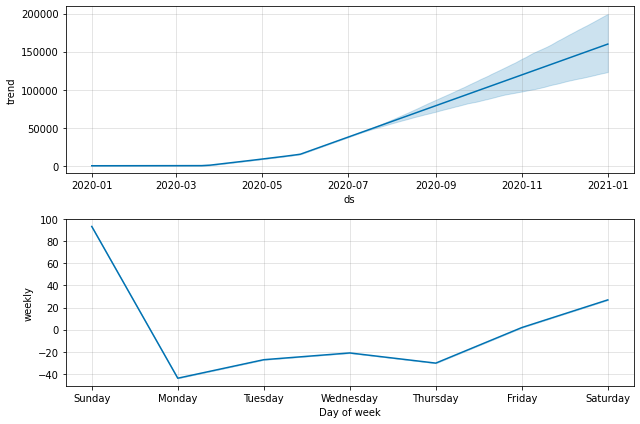

In [36]:
confirmed_forecast_plot = model_total_cases.plot_components(forecast_total_cases)

In [50]:
df_merge_raw = pd.merge(confirmed, forecast_total_cases, on='ds')
df_merge_raw.tail()

,ds,y,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
182,2020-07-01,38511,37780.469391,36860.753514,38612.436343,37780.469391,37780.469391,-21.037690,-21.037690,-21.037690,-21.037690,-21.037690,-21.037690,0.0,0.0,0.0,37759.431701
183,2020-07-02,38805,38444.748245,37565.898868,39300.410832,38444.748245,38444.748245,-30.240056,-30.240056,-30.240056,-30.240056,-30.240056,-30.240056,0.0,0.0,0.0,38414.508189
184,2020-07-03,40336,39109.027099,38262.835001,40031.687622,39109.027099,39109.027099,1.932663,1.932663,1.932663,1.932663,1.932663,1.932663,0.0,0.0,0.0,39110.959762
185,2020-07-04,41830,39773.305953,38979.865017,40663.701737,39773.305953,39773.305953,26.973997,26.973997,26.973997,26.973997,26.973997,26.973997,0.0,0.0,0.0,39800.279950
186,2020-07-05,44254,40437.584808,39738.360782,41363.602522,40437.584808,40437.584808,93.420915,93.420915,93.420915,93.420915,93.420915,93.420915,0.0,0.0,0.0,40531.005722


In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [52]:
forecast_total_cases.rename(columns={'Total Cases (Forecasted)':'yhat'}, inplace=True)
forecast_total_cases.tail(1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
366,2021-01-01,160007.778565,123183.299945,199135.280965,123260.266262,199588.907972,1.932663,1.932663,1.932663,1.932663,1.932663,1.932663,0.0,0.0,0.0,160009.711227


In [53]:
r2_score(df_merge_raw.y, df_merge_raw.yhat)

0.9983810773032485

In [55]:
mean_absolute_error(df_merge_raw.y, df_merge_raw.yhat)

210.84501677702224

### **Forecast Mortality**
Generating a 180 days forecast of total mortality of COVID-19, with 95% interval by creating a predictive model with no tweaking of seasonality-related parameters and additional regressors.

In [ ]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])
model_mortality = Prophet(interval_width=0.95)
model_mortality.fit(deaths)
future_total_deaths = model_mortality.make_future_dataframe(periods=180)
future_total_deaths.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
360,2020-12-26
361,2020-12-27
362,2020-12-28
363,2020-12-29
364,2020-12-30


In [ ]:
forecast_total_deaths = model_mortality.predict(future_total_deaths)
forecast_total_deaths[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
360,2020-12-26,3117.353082,1436.478239,4626.934803
361,2020-12-27,3127.741688,1425.980007,4653.988888
362,2020-12-28,3136.764416,1419.571278,4672.674118
363,2020-12-29,3146.533127,1414.498240,4703.078599
364,2020-12-30,3156.686389,1412.043647,4728.467017


In [ ]:
forecast_total_deaths.to_csv('forecasted_mortality.csv')

In [ ]:
forecast_total_deaths.rename(columns={'yhat':'Deaths (Forecasted)'}, inplace=True)
forecast_total_deaths.tail(1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Deaths (Forecasted)
364,2020-12-30,3157.623703,1412.043647,4728.467017,1412.211904,4731.375788,-0.937314,-0.937314,-0.937314,-0.937314,-0.937314,-0.937314,0.0,0.0,0.0,3156.686389


In [ ]:
#deaths_forecast_plot = model_mortality.plot(forecast_total_deaths, xlabel='Month', ylabel='Number of Deaths')

In [ ]:
fig_forecast_deaths = go.Figure()

fig_forecast_deaths.add_trace(go.Scatter(x=ds_raw['Date'], y=ds_raw['Deaths'], mode='lines', name='Deaths',line=dict(color='blue', width=2)))
fig_forecast_deaths.add_trace(go.Scatter(x=forecast_total_deaths['ds'], y=forecast_total_deaths['Deaths (Forecasted)'], mode='lines', name='Forecasted',line=dict(color='green', width=2)))
fig_forecast_deaths.update_layout(title='Forecast of Mortality in the next 180 days', xaxis_tickfont_size=14,xaxis=dict(title='Date'))

fig_forecast_deaths.show()

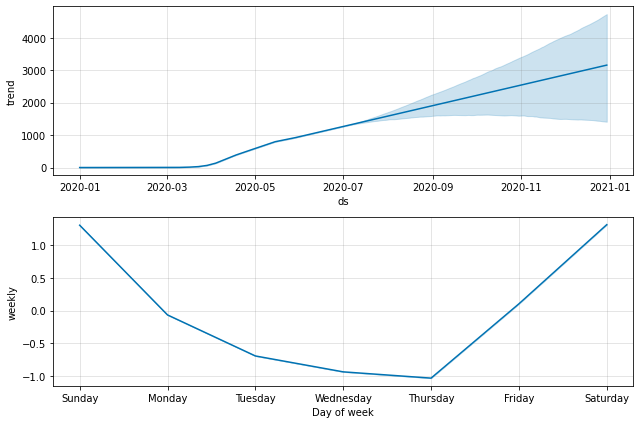

In [ ]:
deaths_forecast_plot = model_mortality.plot_components(forecast_total_deaths)

### **Mortality Rate (Forecasted)**



In [ ]:
forecast_total_cases.tail(1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Total Cases (Forecasted)
364,2020-12-30,153593.522411,115425.234881,188063.325255,115346.779358,188238.360376,16.512657,16.512657,16.512657,16.512657,16.512657,16.512657,0.0,0.0,0.0,153610.035068


In [ ]:
forecast_total_deaths.tail(1)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,Deaths (Forecasted)
364,2020-12-30,3157.623703,1412.043647,4728.467017,1412.211904,4731.375788,-0.937314,-0.937314,-0.937314,-0.937314,-0.937314,-0.937314,0.0,0.0,0.0,3156.686389


In [ ]:
forecasted_cases = round(forecast_total_cases['Total Cases (Forecasted)'].iloc[-1])
forecasted_cases

153610.0

In [ ]:
forecasted_deaths = round(forecast_total_deaths['Deaths (Forecasted)'].iloc[-1])
forecasted_deaths

3157.0

In [ ]:
mortality_rate = round((forecasted_deaths / forecasted_cases)*100,2)
print('Mortality rate in the next 180 days is approximately ' + str(mortality_rate) + '%')

Mortality rate in the next 180 days is approximately 2.06%


### **Estimated Population vs Forecasted Cases**

<a href="https://www.statista.com/statistics/578726/total-population-of-philippines/" rel="nofollow"><img src="https://www.statista.com/graphic/1/578726/total-population-of-philippines.jpg" alt="Statistic: Philippines: Total population from 2014 to 2024 (in million inhabitants) | Statista" style="width: 100%; height: auto !important; max-width:1000px;-ms-interpolation-mode: bicubic;"/></a><br />Find more statistics at  <a href="https://www.statista.com" rel="nofollow">Statista</a>

In [ ]:
estimated_population = 110040000
percentage = round((forecasted_cases/estimated_population)*100,2)
print('Percentage of total population that will be infected in the next 180 days is approximately ' + str(percentage) + '%')

Percentage of total population that will be infected in the next 180 days is approximately 0.14%


# **Inference from the Analysis and Forecast**

If we look at the data and the predicted number of cases, I can say that our country will continue to face challenges in the coming months. The impact on our daily lives and the economy is very evident. We shall continue to take strict measures against this disease. The forecasted number of cases is only based on trends and historical figures. Anything can still happen. The number of confirmed cases is increasing every day but not like in the U.S.A. or other European countries. Don't take it for granted. I think the numbers are still low because of fewer tests being conducted in the country and if we are going to compare it with our total population, the percentage is not even close to 1%. Imagine how many infected people are still around and infecting others inadvertently. It's time to take this pandemic seriously. Please stay at home as much as possible. It won't stop the pandemic, but it would help to reduce the exponential rate at which it is increasing.


#**Data Sources**
- https://www.statista.com/1
- https://www.kaggle.com/imdevskp/corona-virus-report
- https://ourworldindata.org/coronavirus-source-data
- https://www.doh.gov.ph/covid19tracker
- https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide